In [1]:
import pandas as pd

pd.to_datetime('Jan 1 1970')


Timestamp('1970-01-01 00:00:00')

In [2]:
pd.to_datetime('Jan:1:1970')


ParserError: Unknown string format: Jan:1:1970

In [3]:
pd.to_datetime('Jan:1:1970', format='%b:%d:%Y')


Timestamp('1970-01-01 00:00:00')

In [4]:
df = pd.read_csv('https://gist.githubusercontent.com/zgulde/c60209f379155744ced4dfc57068e55b/raw/97fc3ab1e2f6fff6ffd409d60029c53954d5784e/coffee_consumption.csv')


In [5]:
# convert our date column to datetime type
df.date = pd.to_datetime(df.date)
df.dtypes

date                  datetime64[ns]
coffee_consumption           float64
dtype: object

In [6]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.month
df['weekday'] = df.date.dt.day_name()
df.head()

,date,coffee_consumption,year,month,day,weekday
0,2019-01-01,14.301915,2019,1,1,Tuesday
1,2019-01-02,12.905900,2019,1,1,Wednesday
2,2019-01-03,10.046015,2019,1,1,Thursday
3,2019-01-04,6.354805,2019,1,1,Friday
4,2019-01-07,8.545563,2019,1,1,Monday


In [7]:
# cleanup demonstration columns
del df['year']
del df['day']
del df['month']
del df['weekday']

# DateTime Indexes

In [8]:
#.sort_index() is important/
df = df.set_index('date').sort_index()
df

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-07,8.545563
...,...
2019-12-25,12.250875
2019-12-26,7.513206
2019-12-27,9.464345


In [9]:
df.index.min(), df.index.max()


(Timestamp('2019-01-01 00:00:00'), Timestamp('2019-12-31 00:00:00'))

In [10]:
df['2019-05']


,coffee_consumption
date,
2019-05-01,9.970773
2019-05-02,8.755956
2019-05-03,7.790948
2019-05-06,13.196664
2019-05-07,11.725856
2019-05-08,8.495455
2019-05-09,11.407965
2019-05-10,11.344190
2019-05-13,9.517543


In [11]:
df['2019-05-06':'2019-05-16'] # NB. inclusive


,coffee_consumption
date,
2019-05-06,13.196664
2019-05-07,11.725856
2019-05-08,8.495455
2019-05-09,11.407965
2019-05-10,11.344190
2019-05-13,9.517543
2019-05-14,6.220478
2019-05-15,12.743796
2019-05-16,9.169615


In [13]:
df.index.quarter


Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
           dtype='int64', name='date', length=261)

# Changing the Period

**Vocab: upsampling and downsampling**

- downsample: smaller time window == more data points e.g. daily -> hourly *will produce null values into dataset
- upsampling: larger time window == fewer data points
e.g. daily -> weekly

In [16]:
#downsampling... more datapoints
by_day = df.asfreq('D')
by_day

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-05,NaN
...,...
2019-12-27,9.464345
2019-12-28,NaN
2019-12-29,NaN


In [15]:
by_day.shape

(365, 1)

# Filling Missing Values

In [18]:

by_day.assign(
    ffill=lambda df: df.coffee_consumption.ffill(),
    bfill=lambda df: df.coffee_consumption.bfill()
).head(15)

,coffee_consumption,ffill,bfill
date,,,
2019-01-01,14.301915,14.301915,14.301915
2019-01-02,12.905900,12.905900,12.905900
2019-01-03,10.046015,10.046015,10.046015
2019-01-04,6.354805,6.354805,6.354805
2019-01-05,NaN,6.354805,8.545563
2019-01-06,NaN,6.354805,8.545563
2019-01-07,8.545563,8.545563,8.545563
2019-01-08,9.410101,9.410101,9.410101
2019-01-09,7.219271,7.219271,7.219271


In [20]:
df = df.asfreq('D').fillna(0)


In [22]:
df.head(30)

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-05,0.000000
2019-01-06,0.000000
2019-01-07,8.545563
2019-01-08,9.410101
2019-01-09,7.219271


# Resampling

**groupby, but for dates**

In [23]:
df.resample('3W').mean() # Every 3 weeks


,coffee_consumption
date,
2019-01-06,7.268106
2019-01-27,6.960135
2019-02-17,7.753787
2019-03-10,6.723909
2019-03-31,7.901977
2019-04-21,7.301799
2019-05-12,7.208603
2019-06-02,7.894871
2019-06-23,6.851534


In [24]:
df.resample('M').sum()


,coffee_consumption
date,
2019-01-31,233.926749
2019-02-28,206.038853
2019-03-31,219.779000
2019-04-30,222.030626
2019-05-31,248.480093
2019-06-30,183.656493
2019-07-31,248.267463
2019-08-31,224.007066
2019-09-30,215.689004


Knowing that we have missing values for weekends, how could we get a month-by-month average of total weekly coffee consumption?

- total weekly consumption
- average weekly consumption by month

In [25]:
df.resample('W').sum().resample('M').mean()

,coffee_consumption
date,
2019-01-31,47.442870
2019-02-28,52.967916
2019-03-31,51.620292
2019-04-30,50.566915
2019-05-31,52.163714
2019-06-30,48.648939
2019-07-31,52.279082
2019-08-31,53.288159
2019-09-30,50.882459


# Plotting

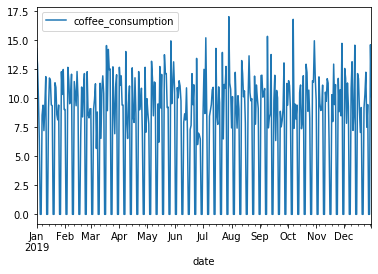

In [26]:
df.plot()

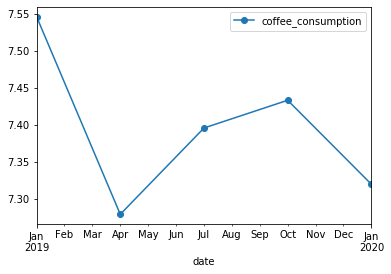

In [28]:
df.resample('3M').mean().plot(marker='o')


# Rolling Windows

,coffee_consumption,rolling_3,rolling_5,rolling_7
date,,,,
2019-01-31,7.546024,NaN,NaN,NaN
2019-02-28,7.358530,NaN,NaN,NaN
2019-03-31,7.089645,7.331400,NaN,NaN
2019-04-30,7.401021,7.283066,NaN,NaN
2019-05-31,8.015487,7.502051,7.482142,NaN
2019-06-30,6.121883,7.179464,7.197313,NaN
2019-07-31,8.008628,7.381999,7.327333,7.363031
2019-08-31,7.226034,7.118848,7.354611,7.317318
2019-09-30,7.189633,7.474765,7.312333,7.293190


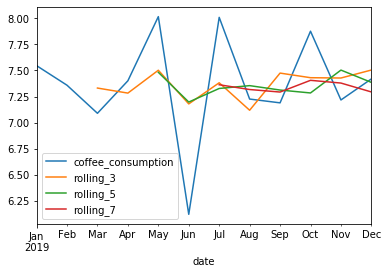

In [31]:
rolling_df = df.resample('M').mean().assign(
    rolling_3=lambda df: df.coffee_consumption.rolling(3).mean(),
    rolling_5=lambda df: df.coffee_consumption.rolling(5).mean(),
    rolling_7=lambda df: df.coffee_consumption.rolling(7).mean(),
)
rolling_df.plot()
rolling_df.head(20)

In [32]:
df.resample('W').mean().rolling(4).sum()


,coffee_consumption
date,
2019-01-06,NaN
2019-01-13,NaN
2019-01-20,NaN
2019-01-27,28.148512
2019-02-03,28.480055
2019-02-10,29.850250
2019-02-17,30.182974
2019-02-24,30.267381
2019-03-03,29.443663


# Lagging and Leading

- **shift**: moves data points forwards of backwards
- **diff**: takes the difference between future or past data points

In [33]:


df['shift(-1)'] = df.coffee_consumption.shift(-1)
df['shift(1)'] = df.coffee_consumption.shift(1)
df['shift(3)'] = df.coffee_consumption.shift(3)
df['diff(1)'] = df.coffee_consumption.diff(1)
df['diff(3)'] = df.coffee_consumption.diff(3)
df.head(25)

,coffee_consumption,shift(-1),shift(1),shift(3),diff(1),diff(3)
date,,,,,,
2019-01-01,14.301915,12.905900,NaN,NaN,NaN,NaN
2019-01-02,12.905900,10.046015,14.301915,NaN,-1.396015,NaN
2019-01-03,10.046015,6.354805,12.905900,NaN,-2.859885,NaN
2019-01-04,6.354805,0.000000,10.046015,14.301915,-3.691210,-7.947110
2019-01-05,0.000000,0.000000,6.354805,12.905900,-6.354805,-12.905900
2019-01-06,0.000000,8.545563,0.000000,10.046015,0.000000,-10.046015
2019-01-07,8.545563,9.410101,0.000000,6.354805,8.545563,2.190757
2019-01-08,9.410101,7.219271,8.545563,0.000000,0.864539,9.410101
2019-01-09,7.219271,9.338456,9.410101,0.000000,-2.190831,7.219271


In [34]:
# cleanup the additional columns
for col in ['shift(-1)', 'shift(1)', 'shift(3)', 'diff(1)', 'diff(3)']:
    del df[col]

# Strftime

In [35]:
df.index.strftime('%B %d, %Y')[:4]


Index(['January 01, 2019', 'January 02, 2019', 'January 03, 2019',
       'January 04, 2019'],
      dtype='object', name='date')

# Timedeltas

In [36]:
start_date = pd.to_datetime('20190204')
graduation_date = pd.to_datetime('20190614')

days_between = graduation_date - start_date
days_between

Timedelta('130 days 00:00:00')

In [37]:
days_between // pd.Timedelta('1d')


130

In [38]:
df['days_since_max'] = (df.index.max() - df.index) // pd.Timedelta('1d')
df.tail(10)

,coffee_consumption,days_since_max
date,,
2019-12-22,0.000000,9
2019-12-23,9.162464,8
2019-12-24,10.372400,7
2019-12-25,12.250875,6
2019-12-26,7.513206,5
2019-12-27,9.464345,4
2019-12-28,0.000000,3
2019-12-29,0.000000,2
2019-12-30,14.623106,1
